In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 16 17:10:53 2020

@author: wanxiang.shen@u.nus.edu
"""

import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.metrics import auc as calculate_auc

import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap, AggModel

np.random.seed(666) #just for reaptable results



In [2]:
df1 = pd.read_excel('./proteins_processed.xlsx', index_col = 0)
df2 = pd.read_excel('./Metabolites_processed.xlsx', index_col = 0)
df2 = df2.loc[df1.index]

df = df1.join(df2)
dfx = df[df.columns[2:]]


In [3]:
dfx.shape, df2.shape, df1.shape

((41, 1486), (41, 847), (41, 641))

In [4]:
dfy = df[['Severe']]*1.

In [5]:
mp = AggMap(dfx, metric = 'correlation')
mp.fit(cluster_channels = 5, verbose = 0,)

2021-07-30 16:48:31,383 - INFO - [bidd-aggmap] - Calculating distance ...
2021-07-30 16:48:31,539 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 1486/1486 [00:01<00:00, 830.97it/s]


2021-07-30 16:49:08,737 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-07-30 16:49:15,178 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-07-30 16:49:18,114 - INFO - [bidd-aggmap] - Finished


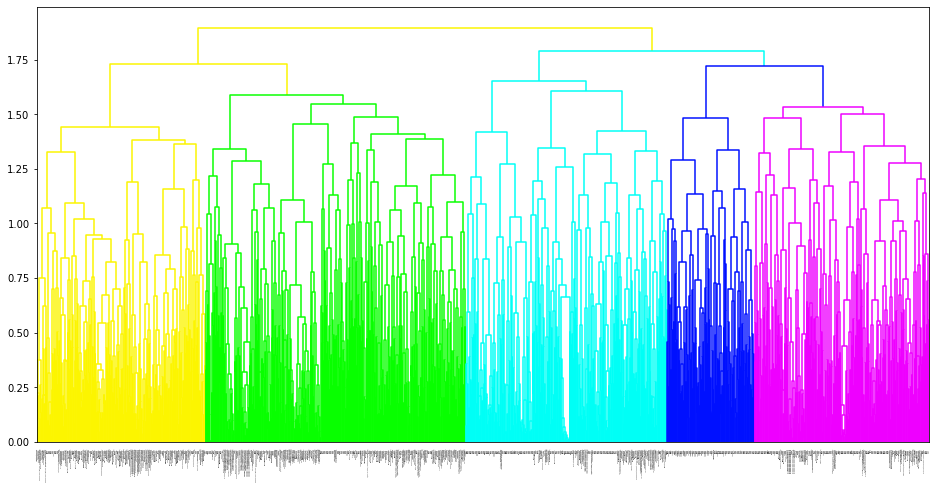

In [9]:
fig_tree = mp.plot_tree(leaf_font_size = 1)
fig_tree.savefig('./results/covid-19.cluster5_tree.png', bbox_inches='tight', dpi=300)

In [8]:
#mp.plot_scatter()
mp.plot_scatter(htmlpath = './results/',enabled_data_labels = True, htmlname = 'covid-19.severe.cluster5_scatter',radius=3)

2021-07-30 16:49:54,163 - INFO - [bidd-aggmap] - generate file: ./covid-19.severe.cluster5_scatter_feature points_1486_correlation_umap_scatter
2021-07-30 16:49:54,200 - INFO - [bidd-aggmap] - save html file to ./covid-19.severe.cluster5_scatter_feature points_1486_correlation_umap_scatter


In [6]:
mp.plot_grid( htmlpath = './results/', htmlname = 'covid-19.severe.cluster5_grid')

2021-07-30 16:49:18,122 - INFO - [bidd-aggmap] - generate file: ./covid-19.severe.cluster5_grid_feature points_1486_correlation_umap_mp
2021-07-30 16:49:18,157 - INFO - [bidd-aggmap] - save html file to ./covid-19.severe.cluster5_grid_feature points_1486_correlation_umap_mp


In [12]:
mp.save('./results/COV-S.mp')

['./results/COV-S.mp']